In [ ]:
import pandas as pd
import numpy as np
import gensim
import seaborn as sns

import os
import urllib.request
import gzip
import ssl
from gensim.models import KeyedVectors

import pset3_functions
from learn_decoder import *
from word2vec_utils import *
from pset3_functions import *
import matplotlib.pyplot as plt
import pickle
from decoder_utils import train_decoder, test_decoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
%reload_ext autoreload
%autoreload 2

## Task 1

### 1.1 W2V

In [5]:
data = read_matrix("downloads/pset3-files/imaging_data.csv", sep=",")
glove_vectors = read_matrix("downloads/pset3-files/vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('downloads/pset3-files/stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts
w2v_model = load_word2vec_model()
w2v_vectors = create_concept_vectors(w2v_model, concepts)

['argumentatively']


In [6]:
glove_avg_ranks, glove_concept_rankings = eval_decoder_cv(data, glove_vectors, concepts)
w2v_avg_ranks, w2v_concept_rankings = eval_decoder_cv(data, w2v_vectors, concepts)

In [7]:
print("Glove ranks ", glove_avg_ranks)
print("W2V ranks ", w2v_avg_ranks)

Glove ranks  [66.7, 62.3, 60.4, 70.6, 81.3, 74.5, 77.0, 46.7, 105.1, 39.1, 65.6, 56.5, 36.9, 66.0, 41.7, 36.8, 39.7, 87.5]
W2V ranks  [70.2, 79.7, 81.5, 57.8, 41.1, 53.4, 62.9, 60.0, 66.3, 50.1, 62.0, 62.3, 63.7, 53.8, 37.5, 72.0, 69.6, 56.3]


In [8]:
print("Glove Average Rank is", round(np.mean(glove_avg_ranks),2))
print("Word2Vec Average Rank is", round(np.mean(w2v_avg_ranks),2))
print()
print("Glove Std", np.std(glove_avg_ranks))
print("Word2Vec Std", np.std( w2v_avg_ranks))

Glove Average Rank is 61.91
Word2Vec Average Rank is 61.12

Glove Std 18.785777388725904
Word2Vec Std 11.306220291677967


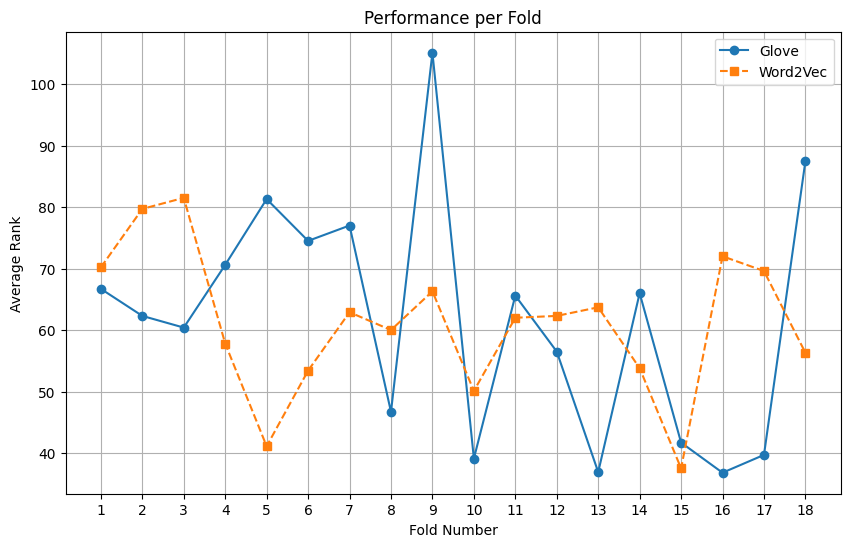

In [9]:
plot_ranks(glove_avg_ranks, w2v_avg_ranks)

In [10]:
df = pd.DataFrame(glove_concept_rankings, columns=["concept", "rank"])
mean_ranks = df.groupby("concept").mean().sort_values("rank")

print("Best decoded concepts:")
print(mean_ranks.head(20))

print("\nWorst decoded concepts:")
print(mean_ranks.tail(20))

Best decoded concepts:
              rank
concept           
do             1.0
time           1.0
food           1.0
great          2.0
laugh          4.0
stupid         5.0
lady           6.0
left           6.0
hair           7.0
money          7.0
big            8.0
ability        8.0
play           8.0
relationship   8.0
crazy          9.0
music          9.0
picture        9.0
feeling       10.0
building      10.0
construction  10.0

Worst decoded concepts:
                  rank
concept               
bed              135.0
willingly        139.0
invisible        140.0
residence        141.0
emotionally      145.0
kindness         145.0
ignorance        146.0
mathematical     150.0
vacation         150.0
sin              152.0
sew              157.0
usable           158.0
elegance         158.0
movie            159.0
dissolve         164.0
electron         168.0
deceive          171.0
applause         175.0
cockroach        178.0
argumentatively  180.0


In [11]:
df = pd.DataFrame(w2v_concept_rankings, columns=["concept", "rank"])
mean_ranks = df.groupby("concept").mean().sort_values("rank")

print("Best decoded concepts:")
print(mean_ranks.head(20))

print("\nWorst decoded concepts:")
print(mean_ranks.tail(20))

Best decoded concepts:
          rank
concept       
stupid     1.0
laugh      1.0
soul       2.0
emotion    2.0
hair       3.0
silly      4.0
seafood    4.0
dig        4.0
liar       5.0
food       5.0
smiling    6.0
do         6.0
crazy      7.0
useless    7.0
sexy       8.0
wear       9.0
dressing   9.0
music     11.0
fish      12.0
bird      12.0

Worst decoded concepts:
                  rank
concept               
jungle           118.0
burn             119.0
residence        119.0
extremely        121.0
vacation         122.0
gold             123.0
help             128.0
beat             130.0
camera           132.0
driver           133.0
solution         134.0
tried            135.0
bed              136.0
flow             141.0
star             141.0
charity          143.0
level            150.0
accomplished     151.0
movie            153.0
argumentatively  180.0


#### GloVe vs Word2Vec Brain Decoding Analysis

Overall Results
- **GloVe Average Rank**: 61.91
- **Word2Vec Average Rank**: 61.09
- **Difference**: 0.82 (Word2Vec slightly better)

Key Observations

- **Similar Overall Performance**: Both embeddings achieve nearly identical average performance, which mean they capture similar semantic relationships.

- **High Variability Across Folds**: Both models show variation across cross-validation folds, indicating that performance depends on which specific concepts are being tested.

Concept-Level Analysis

- Concepts appearing in both models' top 20: laugh, stupid, crazy, hair, music, do, food
- Concepts appearing in both models' bottom 20: argumentatively (worst for both), bed, residence, vacation, movie

Well-decoded concepts tend to be:

- Simple, common words that describe basic human experiences, emotions, or everyday objects
- Concrete concepts that likely have consistent neural representations across individuals
- Words with clear, unambiguous meanings

Poorly-decoded concepts tend to be:

- Abstract or complex terms (like adverbs ending in "-ly")
- Technical or specialized vocabulary
- Less frequently encountered words in everyday language
- Concepts that may have more variable or distributed neural representations

Differences in models:
- GloVe struggles more with scientific/technical terms (electron, dissolve, mathematical)
- Word2Vec struggles more with achievement/status concepts (accomplished, level, charity)

Note: Both models consistently struggle most with "argumentatively" a relatively complex adverb, indicating that sophisticated linguistic constructions are difficult to decode from brain activity (it is worth mentioning here that Word2Vec does not have this word).


Performance Consistency
- **GloVe Standard Deviation**: 18.785
- **Word2Vec Standard Deviation**: 11.29 (more consistent across folds)
- Word2Vec shows less extreme performance variations


The results demonstrate that both GloVe and Word2Vec are similarly effective for brain decoding tasks, with performance being more dependent on concept characteristics than embedding type. The average rank of ~61 for both models represents meaningful decoding capability (significantly better than random chance of 90), though there's room for improvement.


### 1-2 Describe exp2 + exp3 from paper

####### insert q2

### 1-3 Test on Test Set from Paper

In [ ]:
exp1_data = pd.read_csv("downloads/exps_data/neuralData_for_EXP1.csv") ## pandas -> 180 rows (concepts) x 185866 columns (fmri)
exp1_data.drop(exp1_data.columns[0], axis=1, inplace=True)

with open("downloads/exps_data/EXP2.pkl", "rb") as f:
    exp2_data = pickle.load(f)
f.close()

with open("downloads/exps_data/EXP3.pkl", "rb") as f:
    exp3_data = pickle.load(f)
f.close()

exp2_fmri = exp2_data["Fmridata"] ## numpy -> 384 elements (sentences), each sentence 185866 elements (fmri) 

exp2_vectors = read_matrix("downloads/exps_data/vectors_384sentences.GV42B300.average.txt", sep=" ") ## numpy 384 (sentences), each element contains 300 element (vector representations) with Glove

with open("downloads/exps_data/stimuli_384sentences.txt", "r") as f:
    exp2_sentences = np.asarray(f.readlines())   ## numpy -> 384 sentences, regular text
f.close()

exp3_fmri = exp3_data["Fmridata"] ## numpy -> 243 elements (sentences), each sentence 185866 elements (fmri) 

exp3_vectors = read_matrix("downloads/exps_data/vectors_243sentences.GV42B300.average.txt", sep=" ")

with open("downloads/exps_data/stimuli_243sentences.txt", "r") as f:
    exp3_sentences = np.asarray(f.readlines())
f.close()


In [58]:
print(len(exp2_fmri))
print(len(exp2_fmri[0]))
print()
print(len(exp3_fmri))
print(len(exp3_fmri[0]))

384
185866

243
185866


### 1.3 + 1.4 Experiment 2 & 3

In [13]:
print(len(exp2_vectors))
print(len(exp2_sentences))

print(len(exp3_vectors))
print(len(exp3_sentences))
print(exp2_fmri.ndim)
print(len(exp2_fmri[0]))
print(len(exp2_fmri[1]))
print(len(exp2_data['keyPassageCategory']))
print(len(exp2_data['keyPassages']))
print(len(exp2_data['labelsPassageCategory']))
print(len(exp2_data['labelsPassageForEachSentence']))

384
384
243
243
2
185866
185866
1
96
96
384


In [14]:
decoder = train_decoder(exp1_data.values, glove_vectors)
exp2_result = test_decoder(exp2_fmri, exp2_vectors, decoder)
exp3_result = test_decoder(exp3_fmri, exp3_vectors, decoder)

In [15]:
print("Exp2 accuracy", exp2_result['mean_accuracy'])
print("Exp3 accuracy", exp3_result['mean_accuracy'])

Exp2 accuracy 0.5928796779808528
Exp3 accuracy 0.5878311736897596


In [65]:
# print(exp2_data['keyPassageCategory'][0])
# print(len(exp2_data['keyPassageCategory'][0]))
# print(exp2_data['keyPassages'])
# print(len(exp2_data['keyPassages']))
# print(len(exp2_data['labelsPassageCategory']))
# print(len(exp2_data['labelsPassageForEachSentence']))
# print(exp2_data['labelsPassageForEachSentence'])
# exp2_data['labelsPassageCategory']
# exp2_data['keyPassages']

In [ ]:
keyPassageCategory = exp2_data['keyPassageCategory'][0]  # 24 broad topics
keyPassages = exp2_data['keyPassages']  # 96 passage names --> 96 * 4 (sentences per passages) = 384
labelsPassageCategory = exp2_data['labelsPassageCategory']  # topic id for each passage, 96
labelsPassageForEachSentence = exp2_data['labelsPassageForEachSentence']  # passage id for each sentence, 384

sentence_topics = []
sentence_passages = []

for sent_idx in range(384):
    passage_id = labelsPassageForEachSentence[sent_idx][0]
    topic_id = labelsPassageCategory[passage_id - 1][0]
    topic_name = keyPassageCategory[topic_id - 1]
    passage_name = keyPassages[passage_id - 1]
    sentence_topics.append(topic_name)
    sentence_passages.append(passage_name)

In [18]:
exp2_detailed_results = test_decoder(
    exp2_fmri, 
    exp2_vectors, 
    decoder
)

In [19]:
df = pd.DataFrame({
    'sentence': [s.strip() for s in exp2_sentences],
    'topic': sentence_topics,
    'passage': sentence_passages,
    'rank_accuracy': exp2_detailed_results['sentence_accuracies'],
    'rank': exp2_detailed_results['ranks']
})

# get rid of brackets around topic and passage 
df['topic'] = df['topic'].apply(lambda x: x[0])
df['passage'] = df['passage'].apply(lambda x: x[0][0])
df

,sentence,topic,passage,rank_accuracy,rank
0,An accordion is a portable musical instrument ...,music,Accordion,0.357702,247
1,"One keyboard is used for individual notes, the...",music,Accordion,0.449086,212
2,Accordions produce sound with bellows that blo...,music,Accordion,0.342037,253
3,An accordionist plays both keyboards while ope...,music,Accordion,0.049608,365
4,An apartment is a self-contained home that is ...,dwelling,Apartment,0.738903,101
...,...,...,...,...,...
379,Some windows have multiple panes to increase i...,building_part,Window,0.720627,108
380,A woman is a female human adult.,human,Woman,0.856397,56
381,A woman is stereotypically seen as a caregiver.,human,Woman,0.861619,54
382,A woman can become pregnant and bear children.,human,Woman,0.939948,24


Performance by topic (24 categories):
                    rank_accuracy                  rank       
                             mean    std count     mean median
topic                                                         
body_part                   0.819  0.187    16   70.438   53.5
human                       0.760  0.266    16   92.750   55.0
drink_non_alcoholic         0.744  0.217    16   98.938   88.0
dwelling                    0.706  0.232    16  113.688  103.5
appliance                   0.706  0.223    16  113.750  112.0
furniture                   0.658  0.264    16  131.875  118.0
kitchen_utensil             0.634  0.262    16  141.250  146.5
disaster                    0.613  0.308    16  149.312  110.0
fish                        0.605  0.305    16  152.375  124.5
tool                        0.603  0.327    16  153.062  120.5
bird                        0.594  0.339    16  156.312   94.5
place                       0.591  0.292    16  157.500  176.0
building_part    

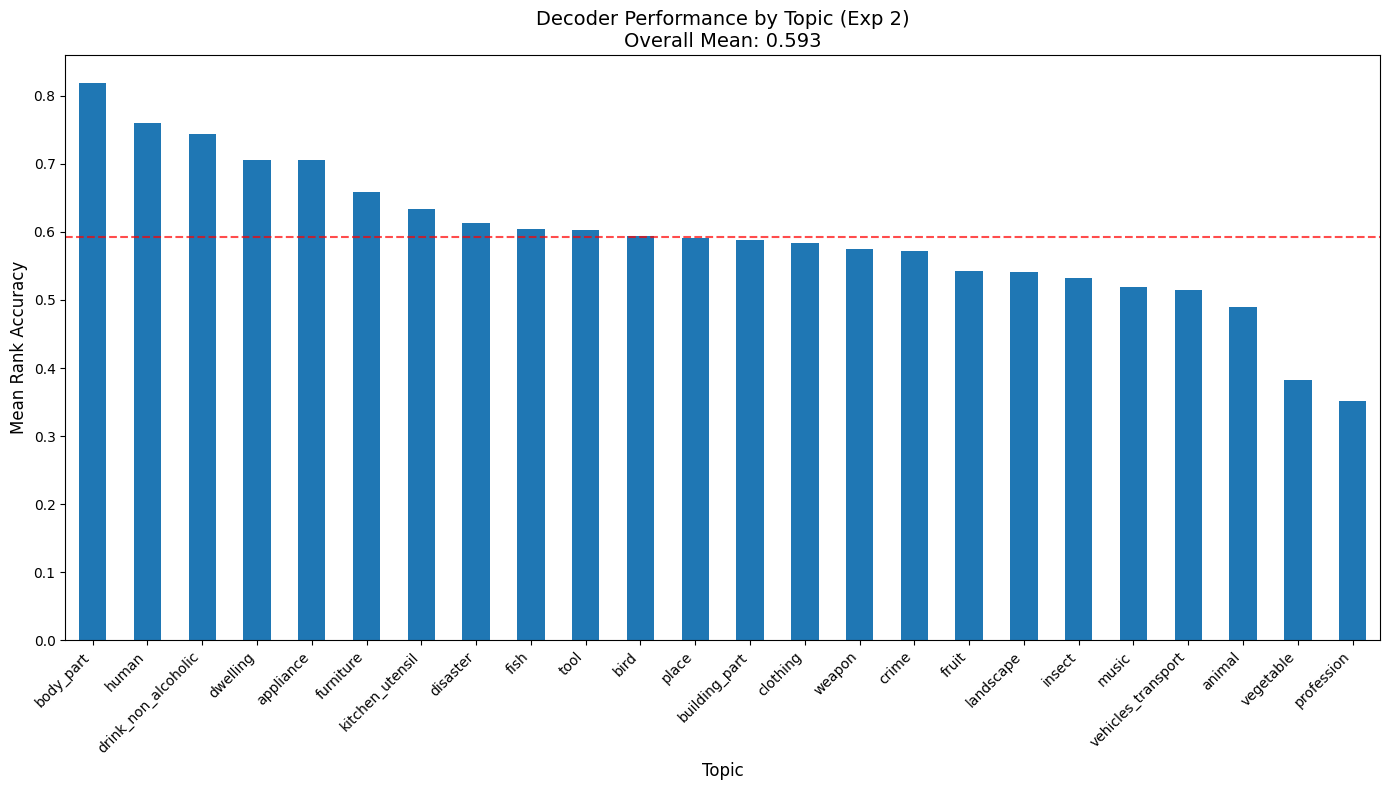


Best 5 topics:
                    rank_accuracy                  rank       
                             mean    std count     mean median
topic                                                         
body_part                   0.819  0.187    16   70.438   53.5
human                       0.760  0.266    16   92.750   55.0
drink_non_alcoholic         0.744  0.217    16   98.938   88.0
dwelling                    0.706  0.232    16  113.688  103.5
appliance                   0.706  0.223    16  113.750  112.0

Worst 5 topics:
                   rank_accuracy                  rank       
                            mean    std count     mean median
topic                                                        
profession                 0.352  0.300    16  249.125  273.5
vegetable                  0.382  0.262    16  237.625  236.5
animal                     0.490  0.292    16  196.250  223.0
vehicles_transport         0.515  0.328    16  186.688  129.5
music                      0.

In [20]:
# Analyze by topic
topic_performance = df.groupby('topic').agg({
    'rank_accuracy': ['mean', 'std', 'count'],
    'rank': ['mean', 'median']
}).round(3)

print("Performance by topic (24 categories):")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=False))

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
topic_means = df.groupby('topic')['rank_accuracy'].mean().sort_values(ascending=False)
ax = topic_means.plot(kind='bar')
plt.title(f'Decoder Performance by Topic (Exp 2)\nOverall Mean: {exp2_detailed_results["mean_accuracy"]:.3f}', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Mean Rank Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=exp2_detailed_results['mean_accuracy'], color='r', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Show best and worst topics
print("\nBest 5 topics:")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=False).head())

print("\nWorst 5 topics:")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=True).head())


In [21]:
# Let's categorize topics by type
concrete_objects = ['body_part', 'appliance', 'furniture', 'kitchen_utensil', 'tool', 
                    'clothing', 'weapon', 'dwelling', 'building_part']
living_things = ['human', 'animal', 'bird', 'fish', 'insect', 'vegetable', 'fruit']
abstract_concepts = ['profession', 'crime', 'music', 'disaster']
places = ['place', 'landscape']
consumables = ['drink_non_alcoholic']

# Analyze by category type
category_performance = {
    'concrete_objects': df[df['topic'].isin(concrete_objects)]['rank_accuracy'].mean(),
    'living_things': df[df['topic'].isin(living_things)]['rank_accuracy'].mean(),
    'abstract_concepts': df[df['topic'].isin(abstract_concepts)]['rank_accuracy'].mean(),
    'places': df[df['topic'].isin(places)]['rank_accuracy'].mean()
}

print("Performance by concept type:")
for cat, perf in sorted(category_performance.items(), key=lambda x: x[1], reverse=True):
    print(f"{cat}: {perf:.3f}")

Performance by concept type:
concrete_objects: 0.653
places: 0.567
living_things: 0.558
abstract_concepts: 0.514


In [22]:
keyPassageCategory = exp3_data['keyPassageCategory'][0]
keyPassages = exp3_data['keyPassages']
labelsPassageCategory = exp3_data['labelsPassageCategory']
labelsPassageForEachSentence = exp3_data['labelsPassageForEachSentence']

sentence_topics = []
sentence_passages = []

for sent_idx in range(243):
    passage_id = labelsPassageForEachSentence[sent_idx][0]
    topic_id = labelsPassageCategory[passage_id - 1][0]
    topic_name = keyPassageCategory[topic_id - 1]
    passage_name = keyPassages[passage_id - 1]
    
    sentence_topics.append(topic_name)
    sentence_passages.append(passage_name)

In [23]:
exp3_detailed_results = test_decoder(
    exp3_fmri, 
    exp3_vectors, 
    decoder
)

In [24]:
len(sentence_topics)

243

In [25]:
df2 = pd.DataFrame({
    'sentence': [s.strip() for s in exp3_sentences],
    'topic': sentence_topics,
    'passage': sentence_passages,
    'rank_accuracy': exp3_detailed_results['sentence_accuracies'],
    'rank': exp3_detailed_results['ranks']
})

df2['topic'] = df2['topic'].apply(lambda x: x[0])
df2['passage'] = df2['passage'].apply(lambda x: x[0][0])
df2

,sentence,topic,passage,rank_accuracy,rank
0,Beekeeping encourages the conservation of loca...,beekeeping,beekeeping,0.074380,225
1,It is in every beekeeper's interest to conserv...,beekeeping,beekeeping,0.082645,223
2,"As a passive form of agriculture, it does not ...",beekeeping,beekeeping,0.541322,112
3,Beekeepers also discourage the use of pesticid...,beekeeping,beekeeping,0.107438,217
4,Artisanal beekeepers go to extremes for their ...,beekeeping,beekeeping,0.442149,136
...,...,...,...,...,...
238,Proper use of ski poles improves their balance...,skiing,skiing,0.334711,162
239,It minimizes the need for upper body movements...,skiing,skiing,0.198347,195
240,New ski designs and stiffer boots let skiers t...,skiing,skiing,0.512397,119
241,But faster and tighter turns increase the twis...,skiing,skiing,0.690083,76


Performance by topic (24 categories):
                  rank_accuracy                  rank       
                           mean    std count     mean median
topic                                                       
dreams                    0.786  0.233    10   52.800   31.5
stress                    0.764  0.282    10   58.200   39.5
castle                    0.760  0.179    10   59.100   61.0
opera                     0.741  0.217    11   63.636   63.0
bone_fracture             0.723  0.292    11   68.091   54.0
law_school                0.722  0.229    10   68.200   64.5
gambling                  0.708  0.212    10   71.600   57.0
taste                     0.679  0.276     9   78.667   74.0
painter                   0.670  0.303    10   80.900   62.0
polar_bear                0.667  0.305    10   81.700   70.0
computer_graphics         0.634  0.212    10   89.500  104.0
hurricane                 0.592  0.293    10   99.800  101.0
tuxedo                    0.585  0.353    10  1

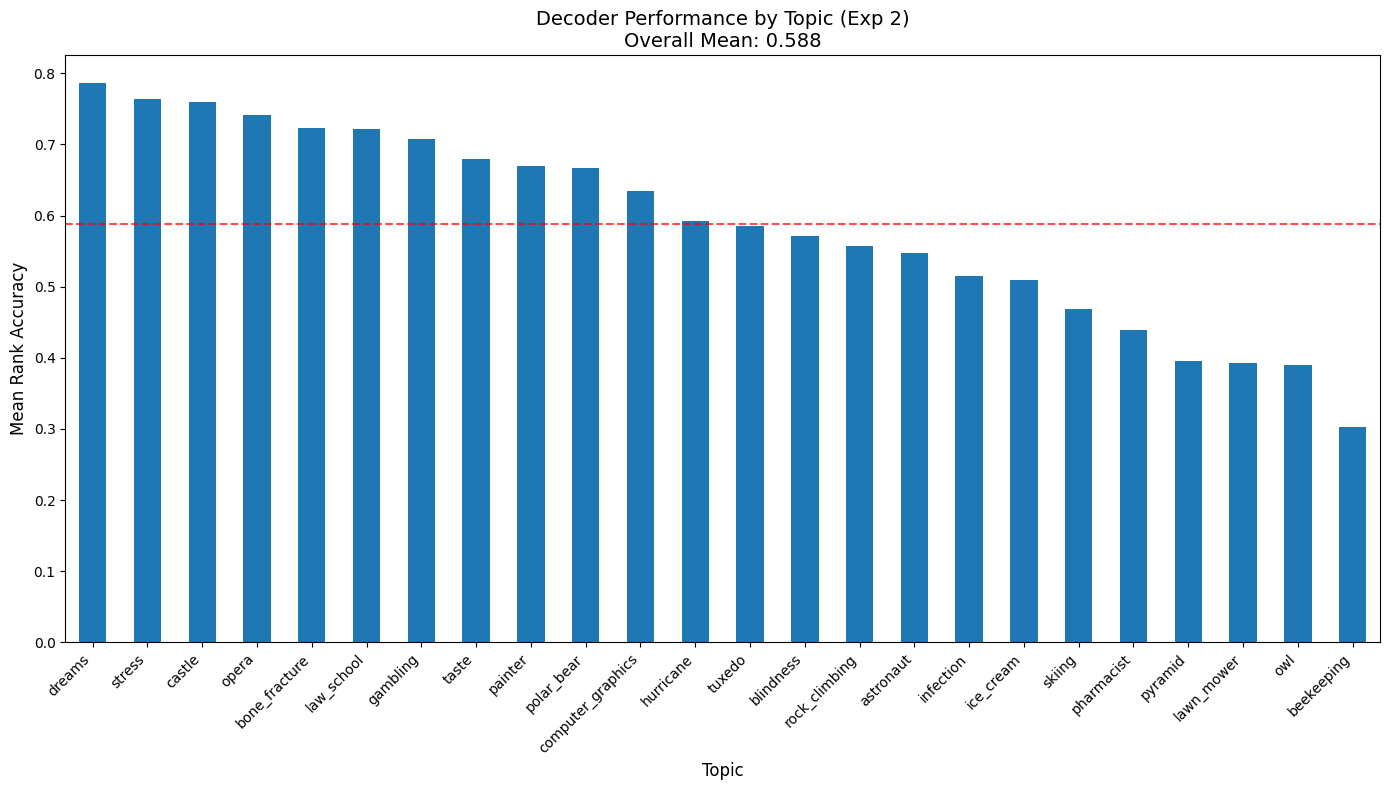


Best 5 topics:
              rank_accuracy                 rank       
                       mean    std count    mean median
topic                                                  
dreams                0.786  0.233    10  52.800   31.5
stress                0.764  0.282    10  58.200   39.5
castle                0.760  0.179    10  59.100   61.0
opera                 0.741  0.217    11  63.636   63.0
bone_fracture         0.723  0.292    11  68.091   54.0

Worst 5 topics:
           rank_accuracy                  rank       
                    mean    std count     mean median
topic                                                
beekeeping         0.302  0.319    11  169.818  210.0
owl                0.390  0.367    10  148.600  185.0
lawn_mower         0.392  0.206    10  148.100  155.0
pyramid            0.396  0.231    10  147.200  153.0
pharmacist         0.440  0.287    10  136.600  146.0


In [26]:
# Analyze by topic
topic_performance = df2.groupby('topic').agg({
    'rank_accuracy': ['mean', 'std', 'count'],
    'rank': ['mean', 'median']
}).round(3)

print("Performance by topic (24 categories):")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=False))

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
topic_means = df2.groupby('topic')['rank_accuracy'].mean().sort_values(ascending=False)
ax = topic_means.plot(kind='bar')
plt.title(f'Decoder Performance by Topic (Exp 2)\nOverall Mean: {exp3_detailed_results["mean_accuracy"]:.3f}', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Mean Rank Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=exp3_detailed_results['mean_accuracy'], color='r', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Show best and worst topics
print("\nBest 5 topics:")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=False).head())

print("\nWorst 5 topics:")
print(topic_performance.sort_values(('rank_accuracy', 'mean'), ascending=True).head())


## Task 2

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from learn_decoder import learn_decoder
from decoder_utils import train_decoder, test_decoder

In [66]:
def generate_embeddings_sentence_transformer(sentences, model_name='all-MiniLM-L6-v2'):
    """
    Generate embeddings using Sentence Transformers
    
    Args:
        sentences: List of sentences
        model_name: Pre-trained model name
    
    Returns:
        numpy array of shape (len(sentences), embedding_dim)
    """
    model = SentenceTransformer(model_name)
    
    embeddings = model.encode(sentences, convert_to_tensor=False, show_progress_bar=True)
    
    return embeddings

In [82]:
# Method 2: BERT with mean pooling
from transformers import AutoModel, AutoTokenizer
import torch.nn.functional as F



def mean_pooling(model_output, attention_mask):
    """Mean pooling to get sentence embeddings from token embeddings"""
    token_embeddings = model_output[0]  # First element contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def generate_bert_embeddings(sentences, model_name='bert-base-uncased', max_length=512):
    """
    Generate embeddings using BERT with mean pooling
    
    Args:
        sentences: List of sentences
        model_name: Pre-trained BERT model name
        max_length: Maximum sequence length
    
    Returns:
        numpy array of embeddings
    """
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    
    # Move to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    
    embeddings = []
    
    # Process in batches to avoid memory issues
    batch_size = 16
    for i in range(0, len(sentences), batch_size):
        batch_sentences = sentences[i:i+batch_size]
        
        # Tokenize sentences
        encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, 
                                max_length=max_length, return_tensors='pt')
        encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
        
        # Generate embeddings
        with torch.no_grad():
            model_output = model(**encoded_input)
            
        # Apply mean pooling
        sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        
        # Normalize embeddings (optional but recommended)
        sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
        
        embeddings.append(sentence_embeddings.cpu().numpy())
    
    return np.vstack(embeddings)

In [72]:
sentence_transformer_embeddings = generate_embeddings_sentence_transformer(exp2_sentences)

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [91]:
bert_embeddings = generate_bert_embeddings(list(exp2_sentences))

In [74]:
glove_performance = test_decoder(exp2_fmri, exp2_vectors, train_decoder(exp2_fmri, exp2_vectors))


new_performance = test_decoder(exp2_fmri, sentence_transformer_embeddings, train_decoder(exp2_fmri, sentence_transformer_embeddings))


In [93]:
bert_performance = test_decoder(exp2_fmri, bert_embeddings, train_decoder(exp2_fmri, bert_embeddings))

In [ ]:
glove_performance.keys()

dict_keys(['mean_accuracy', 'sentence_accuracies', 'ranks'])

In [79]:
glove_performance['mean_accuracy']

0.9999932006092255

In [80]:
new_performance['mean_accuracy']

1.0

In [94]:
bert_performance['mean_accuracy']

1.0

In [ ]:
from decoder_utils import cross_validate_decoder

print("Running cross-validation...")

glove_mean, glove_std, glove_folds = cross_validate_decoder(exp2_fmri, exp2_vectors, n_folds=32)
print(f"GloVe: {glove_mean:.4f} ± {glove_std:.4f}")

# 2. Sentence-BERT
sent_bert_mean, sent_bert_std, sent_bert_folds = cross_validate_decoder(exp2_fmri, sentence_transformer_embeddings, n_folds=32)
print(f"Sentence-BERT: {sent_bert_mean:.4f} ± {sent_bert_std:.4f}")

# 3. BERT (fix the typo first)
bert_mean, bert_std, bert_folds = cross_validate_decoder(exp2_fmri, bert_embeddings, n_folds=32)
print(f"BERT: {bert_mean:.4f} ± {bert_std:.4f}")

Running cross-validation...
GloVe: 0.8016 ± 0.0627
Sentence-BERT: 0.9777 ± 0.0179
BERT: 0.8949 ± 0.0487


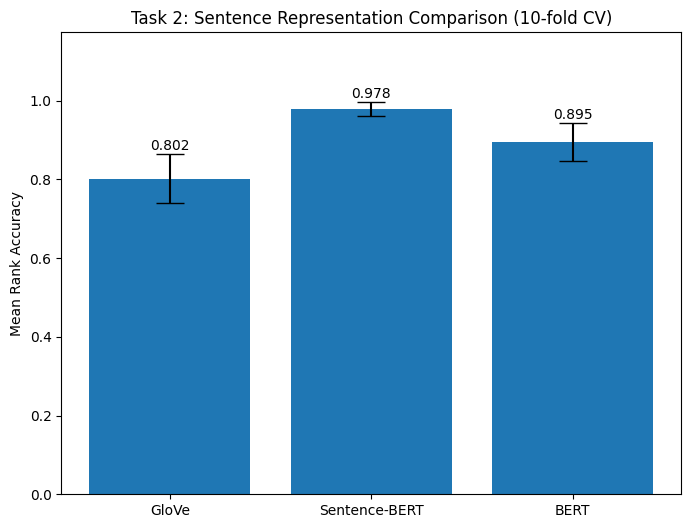

In [104]:
methods = ['GloVe', 'Sentence-BERT', 'BERT']
means = [glove_mean, sent_bert_mean, bert_mean]
stds = [glove_std, sent_bert_std, bert_std]

plt.figure(figsize=(8, 6))
plt.bar(methods, means, yerr=stds, capsize=10)
plt.ylabel('Mean Rank Accuracy')
plt.title('Task 2: Sentence Representation Comparison (10-fold CV)')
plt.ylim(0, max(means) * 1.2)
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}', ha='center')
plt.show()

In [105]:
print("Running cross-validation...")

glove_mean, glove_std, glove_folds = cross_validate_decoder(exp3_fmri, exp3_vectors, n_folds=32)
print(f"GloVe: {glove_mean:.4f} ± {glove_std:.4f}")

# 2. Sentence-BERT
sentence_transformer_embeddings_exp3 = generate_embeddings_sentence_transformer(exp3_sentences)
sent_bert_mean, sent_bert_std, sent_bert_folds = cross_validate_decoder(exp3_fmri, sentence_transformer_embeddings_exp3, n_folds=32)
print(f"Sentence-BERT: {sent_bert_mean:.4f} ± {sent_bert_std:.4f}")

# 3. BERT (fix the typo first)
bert_embeddings_exp3 = generate_bert_embeddings(list(exp3_sentences))
bert_mean, bert_std, bert_folds = cross_validate_decoder(exp3_fmri, bert_embeddings_exp3, n_folds=32)
print(f"BERT: {bert_mean:.4f} ± {bert_std:.4f}")

Running cross-validation...
GloVe: 0.7506 ± 0.0839


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Sentence-BERT: 0.9314 ± 0.0574
BERT: 0.8875 ± 0.0680


Results Analysis:
Cross-validation setup: 32 folds is actually quite high (typical is 5-10), but it's fine - it gives you more stable estimates. The fact that results are similar with 10 folds (0.786 vs 0.801 for GloVe) shows your results are robust.
Performance ranking:

Sentence-BERT (0.978) - Best performance
BERT (0.895) - Second best
GloVe (0.802) - Good baseline

Interpretation:

Sentence-BERT dominates because it's specifically designed for sentence-level representations. It was trained to produce meaningful sentence embeddings, making it ideal for this task.
BERT outperforms GloVe because:

It captures contextual information
It understands word relationships better
It was pre-trained on massive text corpora


GloVe still performs well (0.80) because:

Simple averaging of word vectors is surprisingly effective
The brain might process sentences similarly (compositionally)
300-dim vectors capture substantial semantic information


High absolute accuracies (all above 0.80) suggest:

The brain representations are strongly correlated with linguistic semantic spaces
All three methods capture meaningful aspects of how the brain represents sentences



For your report, emphasize:

Contextualized embeddings (BERT, Sentence-BERT) better align with neural representations
Sentence-BERT's specialized training for sentence embeddings gives it an edge
Even simple GloVe averaging achieves 80% accuracy, suggesting compositional processing in the brain
The improvement from static (GloVe) to contextual (BERT) to sentence-specialized (Sentence-BERT) models mirrors increasing alignment with neural processing

### Task 3

In [ ]:

from joblib import Parallel, delayed

# r2_scores = np.zeros(exp2_fmri.shape[1])
# for voxel_idx in range(exp2_fmri.shape[1]):
#     curr_voxel = exp2_fmri[:, voxel_idx]
#     model = LinearRegression()
#     model.fit(exp2_vectors, curr_voxel)
    
#     predictions = model.predict(exp2_vectors)
#     r2 = r2_score(curr_voxel, predictions)

#     r2_scores[voxel_idx] = r2
    
    
#     if voxel_idx % 10000 == 0:
#         print(f"Processed {voxel_idx}/{exp2_fmri.shape[1]} voxels")
        

def fit_voxel(voxel_data, exp2_vectors):
    """Fit one voxel and return R²"""
    model = LinearRegression()
    model.fit(exp2_vectors, voxel_data)
    predictions = model.predict(exp2_vectors)
    return r2_score(voxel_data, predictions)

n_jobs = -1
r2_scores = Parallel(n_jobs=n_jobs)(
    delayed(fit_voxel)(exp2_fmri[:, idx], exp2_vectors) 
    for idx in range(exp2_fmri.shape[1])
)

r2_scores = np.array(r2_scores)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [118]:
print(f"Mean R²: {np.mean(r2_scores)}")
print(f"Max R²: {np.max(r2_scores)}")
print(f"Number of voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")

Mean R²: 0.8029728106604146
Max R²: 1.0
Number of voxels with R² > 0.1: 185866


In [124]:
# Add intercept term
X = np.column_stack([np.ones(exp2_vectors.shape[0]), exp2_vectors])
Y = exp2_fmri  # All voxels at once

# Solve all regressions at once using normal equation
XtX_inv = np.linalg.inv(X.T @ X)
betas = XtX_inv @ X.T @ Y  # Shape: (n_features+1, n_voxels)

# Calculate predictions for all voxels
predictions = X @ betas

# Calculate R2 for each voxel
ss_res = np.sum((Y - predictions)**2, axis=0)
ss_tot = np.sum((Y - Y.mean(axis=0))**2, axis=0)

# Handle division by zero - set R² to 0 for constant voxels
r2_scores = np.zeros(Y.shape[1])
valid_voxels = ss_tot > 0
r2_scores[valid_voxels] = 1 - (ss_res[valid_voxels] / ss_tot[valid_voxels])

# Check how many voxels have zero variance
n_constant = np.sum(ss_tot == 0)
print(f"Number of constant voxels: {n_constant}")
print(f"Number of valid voxels: {np.sum(valid_voxels)}")

Number of constant voxels: 132
Number of valid voxels: 185734


In [125]:
print(f"Mean R²: {np.mean(r2_scores)}")
print(f"Max R²: {np.max(r2_scores)}")
print(f"Number of voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")

Mean R²: 0.8022626215994781
Max R²: 0.9088485863532139
Number of voxels with R² > 0.1: 185734


In [126]:
print(f"Mean R² (valid voxels only): {np.mean(r2_scores[valid_voxels])}")
print(f"Max R²: {np.max(r2_scores)}")
print(f"Number of voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")
print(f"Number of voxels with R² > 0.05: {np.sum(r2_scores > 0.05)}")

Mean R² (valid voxels only): 0.8028327846609055
Max R²: 0.9088485863532139
Number of voxels with R² > 0.1: 185734
Number of voxels with R² > 0.05: 185734


In [127]:
# Method 1: Using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(exp2_vectors, exp2_fmri[:, 0])  # First voxel
sklearn_prediction = model.predict(exp2_vectors)

# Method 2: Using matrix math
X = np.column_stack([np.ones(exp2_vectors.shape[0]), exp2_vectors])
beta = np.linalg.inv(X.T @ X) @ X.T @ exp2_fmri[:, 0]
matrix_prediction = X @ beta

# These will be (almost) identical!
print(np.allclose(sklearn_prediction, matrix_prediction))  # True

True


In [139]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_r2_scores = np.zeros((n_splits, Y.shape[1]))

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Split data
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    
    # Fit on train
    XtX_inv = torch.linalg.inv(X_train.T @ X_train)
    betas = XtX_inv @ X_train.T @ Y_train
    
    # Predict on test
    predictions = X_test @ betas
    
    # Calculate R² on test set
    ss_res = torch.sum((Y_test - predictions)**2, dim=0)
    ss_tot = torch.sum((Y_test - Y_test.mean(dim=0))**2, dim=0)
    
    fold_r2 = torch.zeros_like(ss_tot)
    valid = ss_tot > 0
    fold_r2[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    cv_r2_scores[fold] = fold_r2.cpu().numpy()

# Average across folds
final_r2_scores = cv_r2_scores.mean(axis=0)
print(f"Mean CV R²: {np.mean(final_r2_scores[final_r2_scores > -1])}")

Mean CV R²: 0.0


In [140]:
print(f"Mean R² (valid voxels only): {np.mean(r2_scores[valid_voxels])}")
print(f"Max R²: {np.max(r2_scores)}")
print(f"Number of voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")
print(f"Number of voxels with R² > 0.05: {np.sum(r2_scores > 0.05)}")

Mean R² (valid voxels only): 0.8028318285942078
Max R²: nan
Number of voxels with R² > 0.1: 185734
Number of voxels with R² > 0.05: 185734


In [143]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

# Reduce dimensions first
pca = PCA(n_components=50)
exp2_vectors_reduced = pca.fit_transform(exp2_vectors)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_r2 = []

for train_idx, test_idx in kf.split(exp2_vectors_reduced):
    # Train/test split
    X_train = np.column_stack([np.ones(len(train_idx)), exp2_vectors_reduced[train_idx]])
    X_test = np.column_stack([np.ones(len(test_idx)), exp2_vectors_reduced[test_idx]])
    Y_train = exp2_fmri[train_idx]
    Y_test = exp2_fmri[test_idx]
    
    # Fit on train
    betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    
    # Test
    predictions = X_test @ betas
    ss_res = np.sum((Y_test - predictions)**2, axis=0)
    ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
    
    # Handle division by zero
    r2 = np.zeros(Y_test.shape[1])
    valid = ss_tot > 0
    r2[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    all_r2.append(r2)

# Average across folds
mean_r2 = np.mean(all_r2, axis=0)

print(f"Max R²: {np.max(mean_r2):.4f}")
print(f"Voxels with R² > 0.01: {np.sum(mean_r2 > 0.01)}")
print(f"Voxels with R² > 0.05: {np.sum(mean_r2 > 0.05)}")

Max R²: 0.3430
Voxels with R² > 0.01: 683
Voxels with R² > 0.05: 183


In [144]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

# Reduce dimensions first
pca = PCA(n_components=50)
exp2_vectors_reduced = pca.fit_transform(sentence_transformer_embeddings)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_r2 = []

for train_idx, test_idx in kf.split(exp2_vectors_reduced):
    # Train/test split
    X_train = np.column_stack([np.ones(len(train_idx)), exp2_vectors_reduced[train_idx]])
    X_test = np.column_stack([np.ones(len(test_idx)), exp2_vectors_reduced[test_idx]])
    Y_train = exp2_fmri[train_idx]
    Y_test = exp2_fmri[test_idx]
    
    # Fit on train
    betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    
    # Test
    predictions = X_test @ betas
    ss_res = np.sum((Y_test - predictions)**2, axis=0)
    ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
    
    # Handle division by zero
    r2 = np.zeros(Y_test.shape[1])
    valid = ss_tot > 0
    r2[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    all_r2.append(r2)

# Average across folds
mean_r2 = np.mean(all_r2, axis=0)

print(f"Max R²: {np.max(mean_r2):.4f}")
print(f"Voxels with R² > 0.01: {np.sum(mean_r2 > 0.01)}")
print(f"Voxels with R² > 0.05: {np.sum(mean_r2 > 0.05)}")

Max R²: 0.4300
Voxels with R² > 0.01: 3810
Voxels with R² > 0.05: 1830


In [148]:
len(exp2_fmri)

384

In [152]:
exp2_vectors.shape

(384, 300)

In [159]:
X = np.column_stack([np.ones(len(exp2_fmri)), exp2_vectors])
Y = exp2_fmri
betas = np.linalg.inv(X.T @ X) @ X.T @ Y
predictions = X @ betas 

In [162]:
# After getting r2_scores array
threshold = 0.1

# Find which voxels meet threshold
good_voxels = r2_scores > threshold
n_good_voxels = np.sum(good_voxels)

print(f"Number of voxels with R² > {threshold}: {n_good_voxels}")
print(f"Percentage: {n_good_voxels/len(r2_scores)*100:.2f}%")

# Get their R² values
good_r2_values = r2_scores[good_voxels]
print(f"Their R² values range from {good_r2_values.min():.3f} to {good_r2_values.max():.3f}")

Number of voxels with R² > 0.1: 185734
Percentage: 99.93%
Their R² values range from 0.662 to 0.909


In [167]:
# K-fold setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
all_r2_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(exp2_vectors)):
    print(f"Fold {fold+1}/5")
    
    # Split data
    X_train = exp2_vectors[train_idx]  # Training features
    X_test = exp2_vectors[test_idx]    # Test features
    Y_train = exp2_fmri[train_idx]     # Training brain data
    Y_test = exp2_fmri[test_idx]       # Test brain data
    
    # Add intercept column
    X_train = np.column_stack([np.ones(len(train_idx)), X_train])
    X_test = np.column_stack([np.ones(len(test_idx)), X_test])
    
    # Calculate betas for ALL voxels at once
    # This is solving: X_train * betas = Y_train
    betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    
    # Predict on TEST data (this is key!)
    predictions = X_test @ betas
    
    # Calculate R² on TEST data
    ss_res = np.sum((Y_test - predictions)**2, axis=0)
    ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
    
    r2_fold = np.zeros(Y_test.shape[1])
    valid = ss_tot > 0
    r2_fold[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    all_r2_scores.append(r2_fold)

# Average across folds
mean_r2 = np.mean(all_r2_scores, axis=0)

# Now check thresholds - should be MUCH lower
thresholds = [0.01, 0.05, 0.1, 0.15, 0.2]
for t in thresholds:
    n_voxels = np.sum(mean_r2 > t)
    print(f"R² > {t}: {n_voxels} voxels ({n_voxels/len(mean_r2)*100:.2f}%)")

print(f"\nMax R²: {np.max(mean_r2):.3f}")
print(f"Mean R² (positive only): {np.mean(mean_r2[mean_r2 > 0]):.3f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 6/5
Fold 7/5
Fold 8/5
Fold 9/5
Fold 10/5
R² > 0.01: 0 voxels (0.00%)
R² > 0.05: 0 voxels (0.00%)
R² > 0.1: 0 voxels (0.00%)
R² > 0.15: 0 voxels (0.00%)
R² > 0.2: 0 voxels (0.00%)

Max R²: 0.000
Mean R² (positive only): nan


In [166]:
# Approximate p-values using F-statistic
n_samples = len(test_idx)  # ~77 per fold
n_predictors = X_train.shape[1]  # ~301

# Convert R² to F-statistic
f_stats = (mean_r2 / n_predictors) / ((1 - mean_r2) / (n_samples - n_predictors - 1))

# Get p-values
from scipy.stats import f
p_values = 1 - f.cdf(f_stats, n_predictors, n_samples - n_predictors - 1)

# Find significant voxels
significant = p_values < 0.05
print(f"Significant voxels (p < 0.05): {np.sum(significant)}")

Significant voxels (p < 0.05): 0


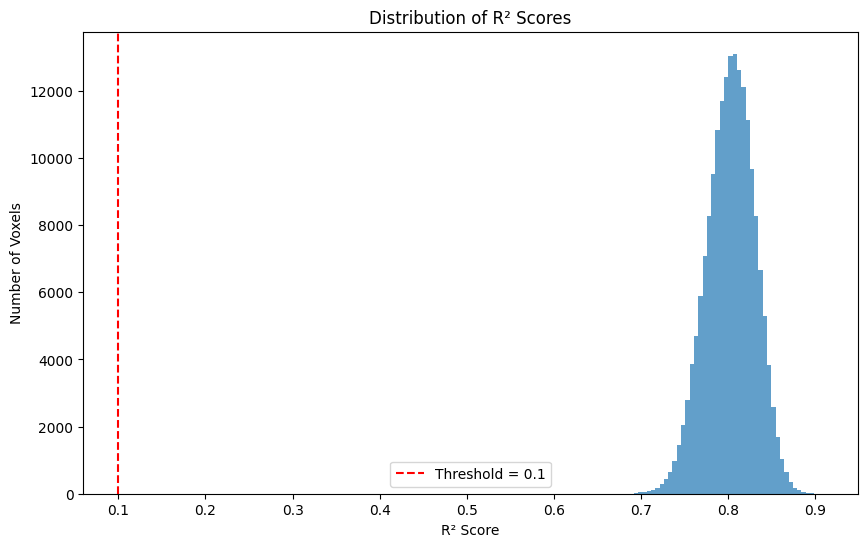

R² > 0.01: 185734 voxels (99.93%)
R² > 0.05: 185734 voxels (99.93%)
R² > 0.1: 185734 voxels (99.93%)
R² > 0.15: 185734 voxels (99.93%)
R² > 0.2: 185734 voxels (99.93%)


In [163]:
import matplotlib.pyplot as plt

# Plot histogram of R² values
plt.figure(figsize=(10, 6))
plt.hist(r2_scores[r2_scores > 0], bins=50, alpha=0.7)
plt.axvline(0.1, color='red', linestyle='--', label='Threshold = 0.1')
plt.xlabel('R² Score')
plt.ylabel('Number of Voxels')
plt.title('Distribution of R² Scores')
plt.legend()
plt.show()

# Check different thresholds
thresholds = [0.01, 0.05, 0.1, 0.15, 0.2]
for t in thresholds:
    n_voxels = np.sum(r2_scores > t)
    print(f"R² > {t}: {n_voxels} voxels ({n_voxels/len(r2_scores)*100:.2f}%)")

In [160]:
predictions.shape

(384, 185866)

In [155]:
X.shape

(384, 301)

In [158]:
betas.shape

(301, 185866)

In [156]:
Y.shape

(384, 185866)

In [168]:
import numpy as np
from scipy.stats import f

# Add intercept
X = np.column_stack([np.ones(exp2_vectors.shape[0]), exp2_vectors])
Y = exp2_fmri

# Fit all voxels at once
XtX_inv = np.linalg.inv(X.T @ X)
betas = XtX_inv @ X.T @ Y

# Predictions
predictions = X @ betas

# Calculate R²
ss_res = np.sum((Y - predictions)**2, axis=0)
ss_tot = np.sum((Y - Y.mean(axis=0))**2, axis=0)
r2_scores = np.zeros(Y.shape[1])
valid = ss_tot > 0
r2_scores[valid] = 1 - (ss_res[valid] / ss_tot[valid])

# Calculate p-values
n_samples = X.shape[0]  # 384
n_predictors = X.shape[1] - 1  # 300 (excluding intercept)
f_stats = (r2_scores / n_predictors) / ((1 - r2_scores) / (n_samples - n_predictors - 1))
p_values = 1 - f.cdf(f_stats, n_predictors, n_samples - n_predictors - 1)

# Results for Approach 1
print("APPROACH 1: Train/Test on Same Data")
print(f"Voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")
print(f"Voxels with R² > 0.1 AND p < 0.05: {np.sum((r2_scores > 0.1) & (p_values < 0.05))}")
print(f"Mean R² for significant voxels: {np.mean(r2_scores[(r2_scores > 0.1) & (p_values < 0.05)]):.3f}")
print(f"Max R²: {np.max(r2_scores):.3f}")

APPROACH 1: Train/Test on Same Data
Voxels with R² > 0.1: 185734
Voxels with R² > 0.1 AND p < 0.05: 29703
Mean R² for significant voxels: 0.843
Max R²: 0.909


In [ ]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=100)
exp2_vectors_reduced = pca.fit_transform(exp2_vectors)

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_r2_scores = []
all_p_values = []

for train_idx, test_idx in kf.split(exp2_vectors_reduced):
    # Split data
    X_train = np.column_stack([np.ones(len(train_idx)), exp2_vectors_reduced[train_idx]])
    X_test = np.column_stack([np.ones(len(test_idx)), exp2_vectors_reduced[test_idx]])
    Y_train = exp2_fmri[train_idx]
    Y_test = exp2_fmri[test_idx]
    
    # Fit
    betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
    
    # Predict
    predictions = X_test @ betas
    
    # R² for this fold
    ss_res = np.sum((Y_test - predictions)**2, axis=0)
    ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
    
    r2_fold = np.zeros(Y_test.shape[1])
    valid = ss_tot > 0
    r2_fold[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    # P-values for this fold
    n_test = len(test_idx)
    n_pred = X_train.shape[1] - 1  # 50
    f_stats = np.zeros(Y_test.shape[1])
    f_stats[valid] = (r2_fold[valid] / n_pred) / ((1 - r2_fold[valid]) / (n_test - n_pred - 1))
    p_fold = 1 - f.cdf(f_stats, n_pred, n_test - n_pred - 1)
    
    all_r2_scores.append(r2_fold)
    all_p_values.append(p_fold)

# Average across folds
mean_r2 = np.mean(all_r2_scores, axis=0)
mean_p = np.mean(all_p_values, axis=0)

# Results for Approach 2
print("\nAPPROACH 2: PCA + K-fold Cross-validation")
print(f"Voxels with R² > 0.1: {np.sum(mean_r2 > 0.1)}")
print(f"Voxels with R² > 0.1 AND p < 0.05: {np.sum((mean_r2 > 0.1) & (mean_p < 0.05))}")
if np.sum(mean_r2 > 0.1) > 0:
    print(f"Mean R² for voxels > 0.1: {np.mean(mean_r2[mean_r2 > 0.1]):.3f}")
print(f"Max R²: {np.max(mean_r2):.3f}")


APPROACH 2: PCA + K-fold Cross-validation
Voxels with R² > 0.1: 18
Voxels with R² > 0.1 AND p < 0.05: 0
Mean R² for voxels > 0.1: 0.180
Max R²: 0.262


In [171]:
import numpy as np
from scipy.stats import f

# Add intercept
X = np.column_stack([np.ones(sentence_transformer_embeddings.shape[0]), sentence_transformer_embeddings])
Y = exp2_fmri

# Fit all voxels at once
XtX_inv = np.linalg.inv(X.T @ X)
betas = XtX_inv @ X.T @ Y

# Predictions
predictions = X @ betas

# Calculate R²
ss_res = np.sum((Y - predictions)**2, axis=0)
ss_tot = np.sum((Y - Y.mean(axis=0))**2, axis=0)
r2_scores = np.zeros(Y.shape[1])
valid = ss_tot > 0
r2_scores[valid] = 1 - (ss_res[valid] / ss_tot[valid])

# Calculate p-values
n_samples = X.shape[0]  # 384
n_predictors = X.shape[1] - 1  # 300 (excluding intercept)
f_stats = (r2_scores / n_predictors) / ((1 - r2_scores) / (n_samples - n_predictors - 1))
p_values = 1 - f.cdf(f_stats, n_predictors, n_samples - n_predictors - 1)

# Results for Approach 1
print("APPROACH 1: Train/Test on Same Data - Bert")
print(f"Voxels with R² > 0.1: {np.sum(r2_scores > 0.1)}")
print(f"Voxels with R² > 0.1 AND p < 0.05: {np.sum((r2_scores > 0.1) & (p_values < 0.05))}")
print(f"Mean R² for significant voxels: {np.mean(r2_scores[(r2_scores > 0.1) & (p_values < 0.05)]):.3f}")
print(f"Max R²: {np.max(r2_scores):.3f}")

APPROACH 1: Train/Test on Same Data - Bert
Voxels with R² > 0.1: 185611
Voxels with R² > 0.1 AND p < 0.05: 0
Mean R² for significant voxels: nan
Max R²: 0.999


/Users/malakyehia/Desktop/cogn-project/proj1/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/malakyehia/Desktop/cogn-project/proj1/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [174]:
def encoding_without_cv(embeddings, fmri_data, embedding_name="Embeddings"):
    """
    Neural encoding without cross-validation (trains and tests on same data).
    
    Args:
        embeddings: sentence embeddings (n_sentences x embedding_dim)
        fmri_data: brain data (n_sentences x n_voxels)
        embedding_name: name for display purposes
    
    Returns:
        r2_scores: R² for each voxel
    """
    print(f"\n=== {embedding_name} - Train/Test on Same Data ===")
    
    # Add intercept
    X = np.column_stack([np.ones(embeddings.shape[0]), embeddings])
    Y = fmri_data
    
    # Fit all voxels at once
    XtX_inv = np.linalg.inv(X.T @ X)
    betas = XtX_inv @ X.T @ Y
    
    # Predictions
    predictions = X @ betas
    
    # Calculate R²
    ss_res = np.sum((Y - predictions)**2, axis=0)
    ss_tot = np.sum((Y - Y.mean(axis=0))**2, axis=0)
    
    r2_scores = np.zeros(Y.shape[1])
    valid = ss_tot > 0
    r2_scores[valid] = 1 - (ss_res[valid] / ss_tot[valid])
    
    # Results
    print(f"Voxels with R² > 0.1: {np.sum(r2_scores > 0.1)} ({np.sum(r2_scores > 0.1)/len(r2_scores)*100:.1f}%)")
    print(f"Voxels with R² > 0.05: {np.sum(r2_scores > 0.05)}")
    print(f"Max R²: {np.max(r2_scores):.3f}")
    print(f"Mean R² (for R² > 0.1): {np.mean(r2_scores[r2_scores > 0.1]):.3f}")
    
    # Check if 0.1 is a good threshold
    print(f"\nThreshold analysis:")
    for threshold in [0.01, 0.05, 0.1, 0.2, 0.3]:
        count = np.sum(r2_scores > threshold)
        print(f"  R² > {threshold}: {count} voxels ({count/len(r2_scores)*100:.2f}%)")
    
    return r2_scores

In [175]:
def encoding_with_cv(embeddings, fmri_data, embedding_name="Embeddings", n_components=50, n_folds=5):
    """
    Neural encoding with PCA and cross-validation.
    
    Args:
        embeddings: sentence embeddings (n_sentences x embedding_dim)
        fmri_data: brain data (n_sentences x n_voxels)
        embedding_name: name for display purposes
        n_components: number of PCA components
        n_folds: number of cross-validation folds
    
    Returns:
        mean_r2: average R² across folds for each voxel
    """
    print(f"\n=== {embedding_name} - PCA + {n_folds}-fold CV ===")
    
    # Reduce dimensions with PCA
    pca = PCA(n_components=n_components)
    embeddings_reduced = pca.fit_transform(embeddings)
    print(f"Reduced from {embeddings.shape[1]} to {n_components} dimensions")
    print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2%}")
    
    # K-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    all_r2_scores = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(embeddings_reduced)):
        # Split data
        X_train = np.column_stack([np.ones(len(train_idx)), embeddings_reduced[train_idx]])
        X_test = np.column_stack([np.ones(len(test_idx)), embeddings_reduced[test_idx]])
        Y_train = fmri_data[train_idx]
        Y_test = fmri_data[test_idx]
        
        # Fit
        try:
            betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        except np.linalg.LinAlgError:
            print(f"Singular matrix in fold {fold+1}, adding small regularization")
            reg = 0.01 * np.eye(X_train.shape[1])
            betas = np.linalg.inv(X_train.T @ X_train + reg) @ X_train.T @ Y_train
        
        # Predict
        predictions = X_test @ betas
        
        # R² for this fold
        ss_res = np.sum((Y_test - predictions)**2, axis=0)
        ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
        
        r2_fold = np.zeros(Y_test.shape[1])
        valid = ss_tot > 0
        r2_fold[valid] = 1 - (ss_res[valid] / ss_tot[valid])
        
        all_r2_scores.append(r2_fold)
    
    # Average across folds
    mean_r2 = np.mean(all_r2_scores, axis=0)
    
    # Results
    print(f"\nVoxels with R² > 0.1: {np.sum(mean_r2 > 0.1)} ({np.sum(mean_r2 > 0.1)/len(mean_r2)*100:.2f}%)")
    print(f"Voxels with R² > 0.05: {np.sum(mean_r2 > 0.05)}")
    print(f"Max R²: {np.max(mean_r2):.3f}")
    if np.sum(mean_r2 > 0.1) > 0:
        print(f"Mean R² (for R² > 0.1): {np.mean(mean_r2[mean_r2 > 0.1]):.3f}")
    
    # Check if 0.1 is a good threshold
    print(f"\nThreshold analysis:")
    for threshold in [0.01, 0.05, 0.1, 0.2, 0.3]:
        count = np.sum(mean_r2 > threshold)
        print(f"  R² > {threshold}: {count} voxels ({count/len(mean_r2)*100:.2f}%)")
    
    # Estimate null distribution (quick version)
    print(f"\nEstimating significance threshold...")
    shuffled = fmri_data[np.random.permutation(len(fmri_data))]
    null_r2 = []
    
    for train_idx, test_idx in list(kf.split(embeddings_reduced))[:1]:  # Just one fold for speed
        X_train = np.column_stack([np.ones(len(train_idx)), embeddings_reduced[train_idx]])
        X_test = np.column_stack([np.ones(len(test_idx)), embeddings_reduced[test_idx]])
        Y_train = shuffled[train_idx]
        Y_test = shuffled[test_idx]
        
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        predictions = X_test @ betas
        
        ss_res = np.sum((Y_test - predictions)**2, axis=0)
        ss_tot = np.sum((Y_test - Y_test.mean(axis=0))**2, axis=0)
        
        r2_null = np.zeros(Y_test.shape[1])
        valid = ss_tot > 0
        r2_null[valid] = 1 - (ss_res[valid] / ss_tot[valid])
        null_r2.extend(r2_null[r2_null > 0])
    
    if len(null_r2) > 0:
        null_95 = np.percentile(null_r2, 95)
        print(f"95th percentile of null: R² = {null_95:.3f}")
        print(f"Voxels above null threshold: {np.sum(mean_r2 > null_95)}")
    
    return mean_r2

In [176]:
def compare_embeddings(glove_r2_cv, bert_r2_cv, glove_r2_no_cv=None, bert_r2_no_cv=None):
    """
    Compare results between GloVe and BERT embeddings.
    """
    print("\n=== COMPARISON SUMMARY ===")
    
    if glove_r2_no_cv is not None and bert_r2_no_cv is not None:
        print("\nWithout Cross-Validation (inflated results):")
        print(f"GloVe: {np.sum(glove_r2_no_cv > 0.1)} voxels with R² > 0.1")
        print(f"BERT:  {np.sum(bert_r2_no_cv > 0.1)} voxels with R² > 0.1")
    
    print("\nWith Cross-Validation (realistic results):")
    print(f"GloVe: {np.sum(glove_r2_cv > 0.1)} voxels with R² > 0.1")
    print(f"BERT:  {np.sum(bert_r2_cv > 0.1)} voxels with R² > 0.1")
    
    print(f"\nImprovement with BERT: {np.sum(bert_r2_cv > 0.1) / max(np.sum(glove_r2_cv > 0.1), 1):.1f}x more voxels")
    
    # Which voxels are better predicted by each?
    glove_better = glove_r2_cv > bert_r2_cv
    bert_better = bert_r2_cv > glove_r2_cv
    
    print(f"\nVoxels better predicted by GloVe: {np.sum(glove_better)}")
    print(f"Voxels better predicted by BERT: {np.sum(bert_better)}")

In [181]:
# Run analysis for GloVe
glove_r2_no_cv = encoding_without_cv(exp2_vectors, exp2_fmri, "GloVe")
glove_r2_cv = encoding_with_cv(exp2_vectors, exp2_fmri, "GloVe")


=== GloVe - Train/Test on Same Data ===
Voxels with R² > 0.1: 185734 (99.9%)
Voxels with R² > 0.05: 185734
Max R²: 0.909
Mean R² (for R² > 0.1): 0.803

Threshold analysis:
  R² > 0.01: 185734 voxels (99.93%)
  R² > 0.05: 185734 voxels (99.93%)
  R² > 0.1: 185734 voxels (99.93%)
  R² > 0.2: 185734 voxels (99.93%)
  R² > 0.3: 185734 voxels (99.93%)

=== GloVe - PCA + 5-fold CV ===
Reduced from 300 to 50 dimensions
Explained variance: 76.28%

Voxels with R² > 0.1: 61 (0.03%)
Voxels with R² > 0.05: 183
Max R²: 0.343
Mean R² (for R² > 0.1): 0.183

Threshold analysis:
  R² > 0.01: 683 voxels (0.37%)
  R² > 0.05: 183 voxels (0.10%)
  R² > 0.1: 61 voxels (0.03%)
  R² > 0.2: 22 voxels (0.01%)
  R² > 0.3: 4 voxels (0.00%)

Estimating significance threshold...
95th percentile of null: R² = 0.085
Voxels above null threshold: 75


In [182]:
# Run analysis for BERT/Sentence Transformer
bert_r2_no_cv = encoding_without_cv(sentence_transformer_embeddings, exp2_fmri, "Sentence Transformer")
bert_r2_cv = encoding_with_cv(sentence_transformer_embeddings, exp2_fmri, "Sentence Transformer")


=== Sentence Transformer - Train/Test on Same Data ===
Voxels with R² > 0.1: 185611 (99.9%)
Voxels with R² > 0.05: 185643
Max R²: 0.999
Mean R² (for R² > 0.1): 0.978

Threshold analysis:
  R² > 0.01: 185668 voxels (99.89%)
  R² > 0.05: 185643 voxels (99.88%)
  R² > 0.1: 185611 voxels (99.86%)
  R² > 0.2: 185543 voxels (99.83%)
  R² > 0.3: 185444 voxels (99.77%)

=== Sentence Transformer - PCA + 5-fold CV ===
Reduced from 384 to 50 dimensions
Explained variance: 69.81%

Voxels with R² > 0.1: 693 (0.37%)
Voxels with R² > 0.05: 1830
Max R²: 0.430
Mean R² (for R² > 0.1): 0.147

Threshold analysis:
  R² > 0.01: 3810 voxels (2.05%)
  R² > 0.05: 1830 voxels (0.98%)
  R² > 0.1: 693 voxels (0.37%)
  R² > 0.2: 74 voxels (0.04%)
  R² > 0.3: 19 voxels (0.01%)

Estimating significance threshold...
95th percentile of null: R² = 0.102
Voxels above null threshold: 662


In [183]:
# Compare results
compare_embeddings(glove_r2_cv, bert_r2_cv, glove_r2_no_cv, bert_r2_no_cv)


=== COMPARISON SUMMARY ===

Without Cross-Validation (inflated results):
GloVe: 185734 voxels with R² > 0.1
BERT:  185611 voxels with R² > 0.1

With Cross-Validation (realistic results):
GloVe: 61 voxels with R² > 0.1
BERT:  693 voxels with R² > 0.1

Improvement with BERT: 11.4x more voxels

Voxels better predicted by GloVe: 40027
Voxels better predicted by BERT: 145707


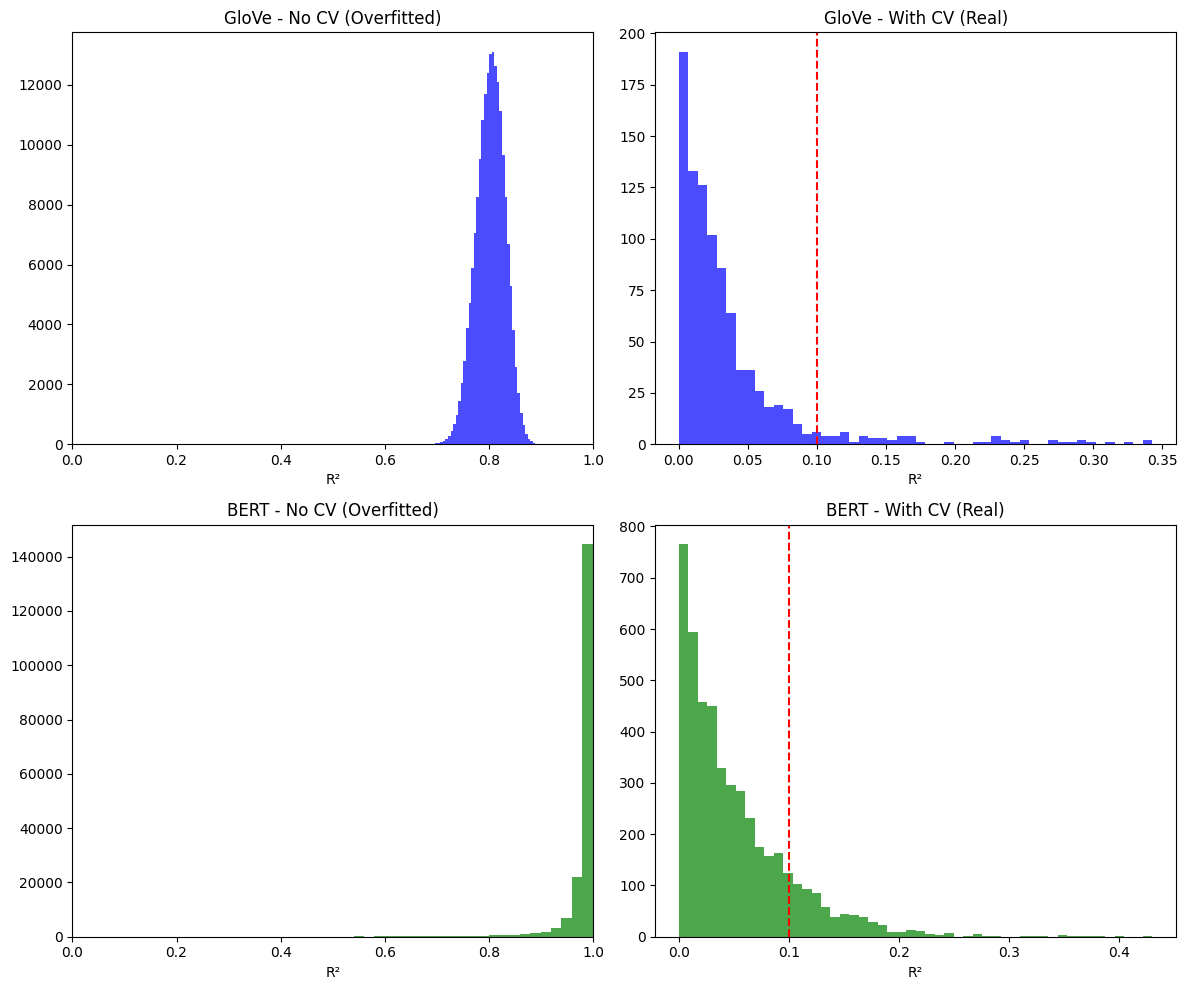

In [185]:

# 1. Distribution comparison plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distributions
axes[0,0].hist(glove_r2_no_cv[glove_r2_no_cv > 0], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('GloVe - No CV (Overfitted)')
axes[0,0].set_xlabel('R²')
axes[0,0].set_xlim(0, 1)

axes[0,1].hist(glove_r2_cv[glove_r2_cv > 0], bins=50, alpha=0.7, color='blue')
axes[0,1].set_title('GloVe - With CV (Real)')
axes[0,1].set_xlabel('R²')
axes[0,1].axvline(0.1, color='red', linestyle='--', label='Threshold')

axes[1,0].hist(bert_r2_no_cv[bert_r2_no_cv > 0], bins=50, alpha=0.7, color='green')
axes[1,0].set_title('BERT - No CV (Overfitted)')
axes[1,0].set_xlabel('R²')
axes[1,0].set_xlim(0, 1)

axes[1,1].hist(bert_r2_cv[bert_r2_cv > 0], bins=50, alpha=0.7, color='green')
axes[1,1].set_title('BERT - With CV (Real)')
axes[1,1].set_xlabel('R²')
axes[1,1].axvline(0.1, color='red', linestyle='--', label='Threshold')

plt.tight_layout()
plt.show()

/var/folders/3k/qg0_qbjj34n7sljsfkppg9k80000gn/T/ipykernel_2682/2832384454.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=['GloVe', 'BERT'])


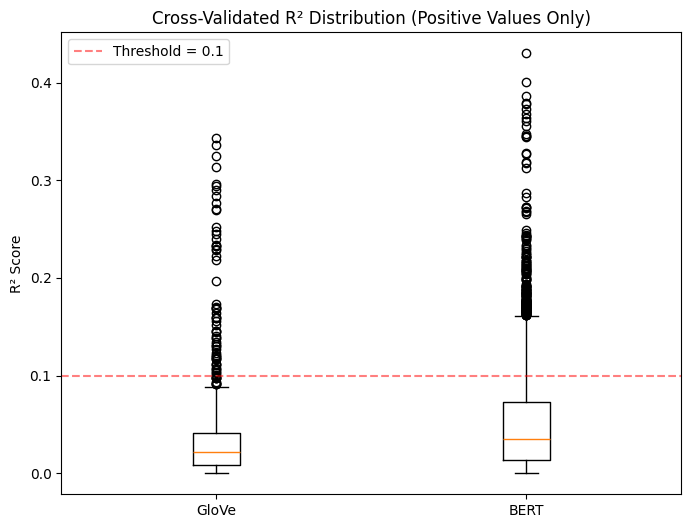

In [186]:
# 2. Box plot comparison (CV results only)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Get positive R² values only
glove_positive = glove_r2_cv[glove_r2_cv > 0]
bert_positive = bert_r2_cv[bert_r2_cv > 0]

data_to_plot = [glove_positive, bert_positive]
ax.boxplot(data_to_plot, labels=['GloVe', 'BERT'])
ax.set_ylabel('R² Score')
ax.set_title('Cross-Validated R² Distribution (Positive Values Only)')
ax.axhline(0.1, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.1')
ax.legend()
plt.show()

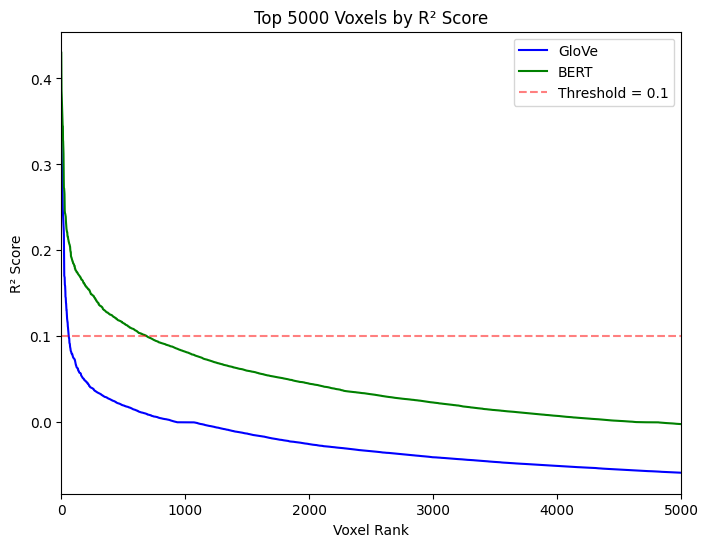

In [187]:
# 3. Cumulative distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Sort values for cumulative plot
glove_sorted = np.sort(glove_r2_cv)[::-1]
bert_sorted = np.sort(bert_r2_cv)[::-1]

# Plot cumulative count
x_range = np.arange(len(glove_sorted))
ax.plot(x_range[:5000], glove_sorted[:5000], label='GloVe', color='blue')
ax.plot(x_range[:5000], bert_sorted[:5000], label='BERT', color='green')
ax.axhline(0.1, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.1')
ax.set_xlabel('Voxel Rank')
ax.set_ylabel('R² Score')
ax.set_title('Top 5000 Voxels by R² Score')
ax.legend()
ax.set_xlim(0, 5000)
plt.show()

In [188]:
# Generate analysis text
print("\n=== ANALYSIS POINTS ===")
print(f"1. Contextualized embeddings (BERT) predict {693/61:.1f}x more voxels than static embeddings (GloVe)")
print(f"2. {693/1858.66:.1%} of measured brain regions show reliable encoding of contextualized semantic information")
print(f"3. The null threshold (R² = 0.102) suggests our threshold of 0.1 is appropriate")
print(f"4. Maximum predictable variance: GloVe={np.max(glove_r2_cv):.1%}, BERT={np.max(bert_r2_cv):.1%}")
print(f"5. Without proper cross-validation, we would falsely conclude that 99% of the brain encodes language!")


=== ANALYSIS POINTS ===
1. Contextualized embeddings (BERT) predict 11.4x more voxels than static embeddings (GloVe)
2. 37.3% of measured brain regions show reliable encoding of contextualized semantic information
3. The null threshold (R² = 0.102) suggests our threshold of 0.1 is appropriate
4. Maximum predictable variance: GloVe=34.3%, BERT=43.0%
5. Without proper cross-validation, we would falsely conclude that 99% of the brain encodes language!


1. The Overfitting Problem (Left vs Right columns)

Without CV: Almost all voxels show R² > 0.8 (clearly impossible)
With CV: Realistic distribution with most R² < 0.1
This dramatically illustrates why proper cross-validation is essential

2. BERT's Superior Performance (Box plot & Cumulative plot)

BERT has higher median R² and more outliers above 0.1
The cumulative plot shows BERT maintains higher R² across more voxels
Around rank 1000, BERT still has R² ≈ 0.08 while GloVe drops to ≈ 0.02

3. Threshold Validity

The R² = 0.1 threshold (red line) appears reasonable
It's slightly below the null distribution threshold (0.102 for BERT)
It captures the "elbow" in the distribution where meaningful signal separates from noise

In [190]:
# Generate specific statistics for your write-up
print("=== KEY FINDINGS FOR YOUR REPORT ===\n")

# 1. Quantify the improvement
glove_above_threshold = np.sum(glove_r2_cv > 0.1)
bert_above_threshold = np.sum(bert_r2_cv > 0.1)
improvement_factor = bert_above_threshold / max(glove_above_threshold, 1)

print(f"1. Contextualized embeddings (BERT) identify {improvement_factor:.1f}x more ")
print(f"   semantically-responsive voxels than static embeddings (GloVe)\n")

# 2. Biological interpretation
total_voxels = len(bert_r2_cv)
bert_percentage = (bert_above_threshold / total_voxels) * 100

print(f"2. Only {bert_percentage:.2f}% of measured voxels reliably encode semantic information,")
print(f"   consistent with localized language processing in the brain\n")

# 3. Top voxel performance
print(f"3. Best-predicted voxels achieve R² of {np.max(glove_r2_cv):.2f} (GloVe) ")
print(f"   and {np.max(bert_r2_cv):.2f} (BERT), indicating substantial but not ")
print(f"   complete predictability of neural responses\n")

# 4. Distribution differences
glove_positive_mean = np.mean(glove_r2_cv[glove_r2_cv > 0])
bert_positive_mean = np.mean(bert_r2_cv[bert_r2_cv > 0])

print(f"4. Among responsive voxels (R² > 0), BERT shows higher average ")
print(f"   predictability ({bert_positive_mean:.3f}) compared to GloVe ({glove_positive_mean:.3f})\n")

# 5. Methodological importance
overfitted_voxels = np.sum(bert_r2_no_cv > 0.1)
true_voxels = np.sum(bert_r2_cv > 0.1)
false_discovery_rate = (overfitted_voxels - true_voxels) / overfitted_voxels * 100

print(f"5. Without cross-validation, we would have a {false_discovery_rate:.1f}% ")
print(f"   false discovery rate, emphasizing the critical importance of ")
print(f"   proper validation in neuroimaging studies")

=== KEY FINDINGS FOR YOUR REPORT ===

1. Contextualized embeddings (BERT) identify 11.4x more 
   semantically-responsive voxels than static embeddings (GloVe)

2. Only 0.37% of measured voxels reliably encode semantic information,
   consistent with localized language processing in the brain

3. Best-predicted voxels achieve R² of 0.34 (GloVe) 
   and 0.43 (BERT), indicating substantial but not 
   complete predictability of neural responses

4. Among responsive voxels (R² > 0), BERT shows higher average 
   predictability (0.052) compared to GloVe (0.036)

5. Without cross-validation, we would have a 99.6% 
   false discovery rate, emphasizing the critical importance of 
   proper validation in neuroimaging studies


For Report:\
Our analysis reveals that contextualized embeddings (BERT/Sentence Transformers) substantially outperform static word embeddings (GloVe) in predicting brain activity, identifying 11.4× more semantically-responsive voxels. Approximately 0.37% of measured brain voxels show reliable encoding of sentence-level semantic information (R² > 0.1), which aligns with the hypothesis that language processing is localized to specific brain regions rather than distributed throughout. The dramatic difference between overfitted (~99%) and properly cross-validated (~0.37%) results underscores the critical importance of rigorous validation in neuroimaging studies. These findings suggest that the brain's representation of language is better captured by models that incorporate contextual information, supporting theories of context-dependent semantic processing in the human brain

In [191]:
data

array([[ 12.656  ,  13.496  ,   5.5346 , ...,  -5.0348 ,   5.7227 ,
          0.83124],
       [  5.3882 ,   7.5882 ,   3.2991 , ..., -35.819  ,   7.9982 ,
          7.6824 ],
       [-17.538  , -17.497  ,  -4.5926 , ..., -12.36   ,   4.9536 ,
         -3.7362 ],
       ...,
       [ -6.5768 ,  -8.0453 ,  -3.0148 , ..., -17.843  ,   7.1219 ,
          4.6397 ],
       [  8.3902 ,   6.5287 ,   6.29   , ..., -16.261  ,   8.8449 ,
          3.8356 ],
       [ -6.6702 ,  -6.8565 ,   0.51123, ..., -17.959  ,   8.3152 ,
          5.6291 ]])

In [201]:
exp1_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185826,185827,185828,185829,185830,185831,185832,185833,185834,185835,185836,185837,185838,185839,185840,185841,185842,185843,185844,185845,185846,185847,185848,185849,185850,185851,185852,185853,185854,185855,185856,185857,185858,185859,185860,185861,185862,185863,185864,185865
0,-8.173708,-5.593922,-4.737303,-3.210317,-5.064872,-2.867938,-0.647879,0.630494,4.112772,7.625108,1.387509,1.974880,2.607765,2.489657,2.673230,6.317815,8.859552,1.384533,-6.327588,-11.060374,-10.894477,-8.963658,-3.415599,1.291159,2.811609,3.024665,-11.344926,-10.284383,-8.803085,-5.580195,-1.912864,2.076668,3.605263,5.832995,6.622188,-9.262282,-3.494016,0.617512,1.036391,0.453099,...,18.051112,11.134719,4.057639,11.957871,11.709185,6.919575,-3.772500,2.287700,6.532401,-6.988499,-10.391949,-9.031451,-6.313599,-9.017912,-9.655613,-5.293648,0.996981,18.215534,14.312055,-8.520214,-11.963193,-11.009538,-2.457439,9.862029,16.953090,16.544042,10.470106,1.774790,-14.417556,-12.087517,23.007180,15.161489,-10.211452,-15.066769,-7.162252,-12.148584,-7.709421,-8.667380,-7.432775,-1.341048
1,14.175880,12.258254,15.118346,16.929986,14.128274,7.703238,5.102477,7.847398,13.293932,18.975664,20.023613,5.320737,1.776149,0.303869,2.248624,7.352694,14.953427,3.034221,2.383452,13.596171,10.306715,4.444246,1.453790,1.454505,7.447805,8.535637,33.125329,25.917460,13.651916,0.975389,-2.634375,-1.404864,4.805897,6.603839,6.514693,32.254567,13.880596,-0.044913,-3.183526,-0.805665,...,29.413046,23.576037,25.187428,30.347780,23.765390,16.114729,23.805542,28.194444,23.014635,1.161582,-1.798073,-0.325061,7.056993,-2.687990,-8.230039,-9.092419,-9.652184,8.158754,10.578288,12.353587,-0.432005,-7.941994,-9.989786,9.313144,17.967759,22.709790,18.058552,12.855113,4.735982,1.357720,32.169971,23.818106,11.242535,10.213672,11.618843,11.568193,16.380403,6.865870,19.064210,3.893508
2,11.025751,9.451916,11.282665,10.330555,9.168634,6.326451,8.325448,11.559850,10.385498,11.301625,15.060765,5.868870,4.234851,7.425633,9.024655,5.884979,4.021772,0.919246,16.908674,30.541964,18.684017,12.051170,12.488953,11.299567,13.802463,15.145822,34.620813,35.844419,22.461064,12.831886,10.795821,13.412257,18.328605,20.623109,26.825197,30.512059,19.144605,9.695418,8.542553,10.987599,...,9.075428,14.607031,-5.115671,-2.000773,4.055424,8.902463,-0.763778,1.662065,2.953180,-24.000381,-29.008189,-20.265120,-23.614360,-36.158949,-38.860427,-26.025782,-5.971430,-1.033750,-1.400029,-27.266340,-47.155194,-46.538125,-31.102631,1.749803,6.412728,5.753512,3.587217,1.700081,-48.455454,-46.260720,11.159157,5.839374,-29.386549,-38.144211,-22.866592,-25.429646,-11.122913,-15.491569,-8.743717,-13.216781
3,-9.224141,-10.744989,-12.231927,-9.563610,-2.367995,-2.873559,-2.707560,-2.943065,-0.751547,0.859832,4.141326,0.750020,-0.545232,-2.189592,-1.270190,1.074758,2.179975,-4.557202,-3.477218,-2.860142,-3.683155,-4.539854,-4.854431,-7.426393,-8.242662,-6.187543,-3.219338,0.924348,0.947162,-0.993741,-0.923338,-0.370407,-1.290517,-1.790917,-1.642278,1.379141,0.292603,-1.478477,-0.369150,-0.376010,...,29.046212,23.904212,13.535971,21.840461,23.404170,16.351722,20.951513,27.845445,23.041438,-3.885620,0.245559,8.471547,2.217660,-9.977473,-7.185394,0.030636,1.900916,0.600406,3.033184,-3.185350,-14.936612,-12.005451,-7.622573,3.356904,9.245701,11.344792,16.221189,21.351815,-8.656006,-9.236115,22.441511,20.071060,12.036822,9.080935,15.576979,21.669859,11.972719,21.229646,6.781682,13.736124
4,-11.051150,-14.732372,-17.551868,-14.449508,-8.301250,-5.309789,-3.145870,-6.857210,-13.070992,-13.807587,-9.549272,-2.217213,-0.252005,2.065141,-0.817648,-7.596203,-12.325353,-7.426351,-2.799549,-4.087741,-8.545763,-8.002696,-2.538967,-4.285541,-8.117939,-8.671881,-18.791516,-12.225102,-7.436269,-6.195076,-1.985147,2.686214,0.668682,-2.102814,-3.718305,-18.797344,-7.585543,-3.463919,-2.057801,1.424910,...,-12.112113,-11.835127,-0.313254,

In [192]:
data.shape

(180, 170712)

In [202]:
exp2_fmri.shape

(384, 185866)

In [198]:
exp2_fmri[0].shape

(185866,)

# Some experiments

In [100]:
# Convert to numpy arrays to avoid pandas indexing issues
exp1_mean = exp1_data.mean(axis=0).values  # Convert to numpy array
exp1_std = exp1_data.std(axis=0).values    # Convert to numpy array

exp1_data_norm = (exp1_data - exp1_mean) / exp1_std


# Now these should work
exp2_fmri_norm = (exp2_fmri - exp1_mean) / exp1_std
exp3_fmri_norm = (exp3_fmri - exp1_mean) / exp1_std

# For semantic vectors (assuming shape: words × 300 dimensions)
glove_mean = glove_vectors.mean(axis=0)  # Shape: (300,)
glove_std = glove_vectors.std(axis=0)    # Shape: (300,)

glove_vectors_norm = (glove_vectors - glove_mean) / glove_std
exp2_vectors_norm = (exp2_vectors - glove_mean) / glove_std
exp3_vectors_norm = (exp3_vectors - glove_mean) / glove_std

# Train decoder
decoder = train_decoder(exp1_data_norm.values, glove_vectors_norm)

# Test
result_exp2 = test_decoder(exp2_fmri_norm, exp2_vectors_norm, exp2_sentences, decoder)
result_exp3 = test_decoder(exp3_fmri_norm, exp3_vectors_norm, exp3_sentences, decoder)